In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch

### calc conv

In [1]:
def calc_conv_output(
    height=32, 
    kernel=3, 
    stride=1, 
    padding=0, 
    dilation=1,
    transpose=False):
    if not transpose:
        return np.floor((height + 2 * padding - dilation * (kernel-1) - 1.0) / stride + 1)
    else:
        return (height - 1) * stride - 2 * padding + dilation * (kernel - 1) + 1

In [105]:
h = 128
i = 1
while h != 1:
    res = calc_conv_output(
        height=h,
        kernel=4,
        stride=2,
        padding=1
    )
    print(f'iter{i}: {h} -> {res}')
    i += 1
    h = res

iter1: 128 -> 64.0
iter2: 64.0 -> 32.0
iter3: 32.0 -> 16.0
iter4: 16.0 -> 8.0
iter5: 8.0 -> 4.0
iter6: 4.0 -> 2.0
iter7: 2.0 -> 1.0


In [104]:
calc_conv_output(
        height=4,
        kernel=4,
        stride=2,
        padding=0
    )

1.0

In [32]:
h = 128
i = 1
while h != 1:
    res = calc_conv_output(
        height=h,
        kernel=3,
        stride=2,
        padding=1
    )
    print(f'iter{i}: {h} -> {res}')
    i += 1
    h = res

iter1: 128 -> 64.0
iter2: 64.0 -> 32.0
iter3: 32.0 -> 16.0
iter4: 16.0 -> 8.0
iter5: 8.0 -> 4.0
iter6: 4.0 -> 2.0
iter7: 2.0 -> 1.0


In [10]:
h = 128
i = 1
while h != 1:
    res = calc_conv_output(
        height=h,
        kernel=4,
        stride=2,
        padding=1
    )
    print(f'iter{i}: {h} -> {res}')
    i += 1
    h = res

iter1: 128 -> 64.0
iter2: 64.0 -> 32.0
iter3: 32.0 -> 16.0
iter4: 16.0 -> 8.0
iter5: 8.0 -> 4.0
iter6: 4.0 -> 2.0
iter7: 2.0 -> 1.0


128 -> 64 -> 32 -> 16 -> 15 -> 14\
35 -> 17 -> 8 -> 4 -> 3 -> 2

In [33]:
calc_conv_output(
    height=33,
    kernel=3,
    stride=1,
    padding=1
)

33.0

### model

In [13]:
%load_ext autoreload
%autoreload 2

In [12]:
import cycle_gan

In [14]:
from data_loader import get_loaders

In [29]:
parser = cycle_gan.create_parser()
opts = parser.parse_args()

usage: ipykernel_launcher.py [-h]
ipykernel_launcher.py: error: unrecognized arguments: -f C:\Users\Alex\AppData\Roaming\jupyter\runtime\kernel-0c972455-e519-4e1c-baa0-5be7f682c214.json


SystemExit: 2

In [38]:
def pars_test():
    pars = argparse.ArgumentParser()
    pars.add_argument('--X', type=str, default='Apple', choices=['Apple', 'Windows'], help='Choose the type of images for domain X.')
    return pars

In [40]:
a = pars_test()
known, unknown = a.parse_known_args()
print(known)

Namespace(X='Apple')


In [29]:
parser = cycle_gan.create_parser()
opts, _ = parser.parse_known_args()
## test train model
# opts.sample_every = 10
# opts.checkpoint_every = 10
# opts.train_iters = 11
# opts.load = 'checkpoints_cyclegan'
cycle_gan.print_opts(opts)

                                      Opts                                      
--------------------------------------------------------------------------------
                             image_size: 128                                    
                             g_conv_dim: 32                                     
                             d_conv_dim: 32                                     
             use_cycle_consistency_loss: 1                                      
                            train_iters: 10                                     
                             batch_size: 16                                     
                                     lr: 0.0002                                 
                                  beta1: 0.5                                    
                                  beta2: 0.999                                  
                                      X: A                                      
                            

In [8]:
opts.train_iters = 250000
cycle_gan.print_opts(opts)

                                      Opts                                      
--------------------------------------------------------------------------------
                             image_size: 128                                    
                             g_conv_dim: 32                                     
                             d_conv_dim: 32                                     
             use_cycle_consistency_loss: 1                                      
                            train_iters: 250000                                 
                             batch_size: 16                                     
                                     lr: 0.0003                                 
                                  beta1: 0.5                                    
                                  beta2: 0.999                                  
                                      X: A                                      
                            

In [15]:
train_loader, test_loader = get_loaders(opts.X, opts)

In [18]:
def denormalize_img(img):
    img = (img - img.min()) / (img.max() - img.min())
    return img.detach().cpu().numpy().transpose(1, 2, 0)

In [16]:
for img, label in train_loader:
    print(img.shape, label.shape)
    break

torch.Size([16, 3, 128, 128]) torch.Size([16])


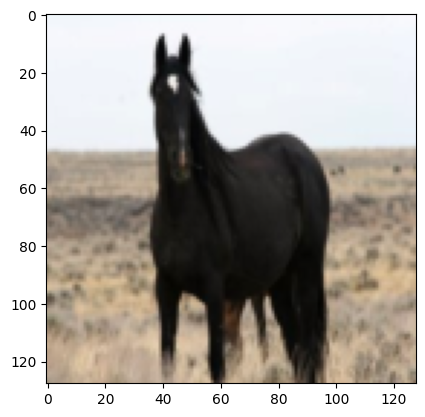

In [19]:
plt.imshow(denormalize_img(img[0]))
# plt.imshow(img[0])
plt.show()

In [82]:
train_iter = iter(train_loader)

In [86]:
a = next(train_iter)

In [89]:
a[0].shape

torch.Size([16, 3, 128, 128])

In [25]:
# torch.ones_like(label, dtype=float)
torch.ones_like(label).float()

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [47]:
%pip install imageio

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: C:\Users\Alex\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


trained for 46000 iters\
on a notebook ~ 3 it/sec\
on a PC ~ 12 it/sec

In [ ]:
cycle_gan.main(opts)

Models moved to GPU.


  0%|▏                                                                          | 501/250000 [00:52<6:44:09, 10.29it/s]

Iteration [  500/250000] | d_real_loss: 0.8273 | d_Y_loss: 0.1310 | d_X_loss: 0.1285 | d_fake_loss: 0.2594 | g_loss: 0.6951


  0%|▎                                                                          | 998/250000 [01:33<5:51:54, 11.79it/s]

Iteration [ 1000/250000] | d_real_loss: 0.2082 | d_Y_loss: 0.0942 | d_X_loss: 0.1837 | d_fake_loss: 0.2779 | g_loss: 0.6693
Saved samples_cyclegan\sample-001000-X-Y.png


  0%|▎                                                                        | 1000/250000 [01:34<10:50:29,  6.38it/s]

Saved samples_cyclegan\sample-001000-Y-X.png


  1%|▍                                                                         | 1501/250000 [02:20<5:50:53, 11.80it/s]

Iteration [ 1500/250000] | d_real_loss: 0.3163 | d_Y_loss: 0.0829 | d_X_loss: 0.1278 | d_fake_loss: 0.2107 | g_loss: 0.7078


  1%|▌                                                                         | 1999/250000 [03:03<5:56:06, 11.61it/s]

Iteration [ 2000/250000] | d_real_loss: 0.2076 | d_Y_loss: 0.1322 | d_X_loss: 0.1271 | d_fake_loss: 0.2592 | g_loss: 0.7485
Saved samples_cyclegan\sample-002000-X-Y.png
Saved samples_cyclegan\sample-002000-Y-X.png


  1%|▋                                                                         | 2501/250000 [03:48<5:42:54, 12.03it/s]

Iteration [ 2500/250000] | d_real_loss: 0.2209 | d_Y_loss: 0.2621 | d_X_loss: 0.0768 | d_fake_loss: 0.3389 | g_loss: 0.6457


  1%|▉                                                                         | 2999/250000 [04:29<5:41:22, 12.06it/s]

Iteration [ 3000/250000] | d_real_loss: 0.2078 | d_Y_loss: 0.1488 | d_X_loss: 0.1379 | d_fake_loss: 0.2867 | g_loss: 0.7589
Saved samples_cyclegan\sample-003000-X-Y.png
Saved samples_cyclegan\sample-003000-Y-X.png


  1%|█                                                                         | 3501/250000 [05:13<5:42:48, 11.98it/s]

Iteration [ 3500/250000] | d_real_loss: 0.6817 | d_Y_loss: 0.0896 | d_X_loss: 0.0720 | d_fake_loss: 0.1616 | g_loss: 0.6741


  2%|█▏                                                                        | 3999/250000 [05:53<5:27:57, 12.50it/s]

Iteration [ 4000/250000] | d_real_loss: 0.2971 | d_Y_loss: 0.1027 | d_X_loss: 0.1264 | d_fake_loss: 0.2292 | g_loss: 0.6331
Saved samples_cyclegan\sample-004000-X-Y.png
Saved samples_cyclegan\sample-004000-Y-X.png


  2%|█▎                                                                        | 4501/250000 [06:34<5:42:43, 11.94it/s]

Iteration [ 4500/250000] | d_real_loss: 0.7997 | d_Y_loss: 0.1239 | d_X_loss: 0.6765 | d_fake_loss: 0.8004 | g_loss: 0.6332


  2%|█▍                                                                        | 4999/250000 [07:16<5:35:07, 12.18it/s]

Iteration [ 5000/250000] | d_real_loss: 0.2151 | d_Y_loss: 0.1416 | d_X_loss: 0.1242 | d_fake_loss: 0.2657 | g_loss: 0.6794
Saved samples_cyclegan\sample-005000-X-Y.png


  2%|█▍                                                                       | 5001/250000 [07:17<10:21:15,  6.57it/s]

Saved samples_cyclegan\sample-005000-Y-X.png


  2%|█▋                                                                        | 5501/250000 [07:57<5:33:12, 12.23it/s]

Iteration [ 5500/250000] | d_real_loss: 0.2293 | d_Y_loss: 0.0953 | d_X_loss: 0.1263 | d_fake_loss: 0.2216 | g_loss: 0.6470


  2%|█▊                                                                        | 5999/250000 [08:37<5:36:25, 12.09it/s]

Iteration [ 6000/250000] | d_real_loss: 0.7583 | d_Y_loss: 0.1334 | d_X_loss: 0.3470 | d_fake_loss: 0.4803 | g_loss: 0.7567
Saved samples_cyclegan\sample-006000-X-Y.png


  2%|█▊                                                                       | 6001/250000 [08:38<10:18:09,  6.58it/s]

Saved samples_cyclegan\sample-006000-Y-X.png


  3%|█▉                                                                        | 6501/250000 [09:19<5:26:45, 12.42it/s]

Iteration [ 6500/250000] | d_real_loss: 0.5105 | d_Y_loss: 0.1979 | d_X_loss: 0.1142 | d_fake_loss: 0.3121 | g_loss: 0.6793


  3%|██                                                                        | 6998/250000 [10:01<5:21:54, 12.58it/s]

Iteration [ 7000/250000] | d_real_loss: 0.6310 | d_Y_loss: 0.1343 | d_X_loss: 0.1880 | d_fake_loss: 0.3222 | g_loss: 0.7310
Saved samples_cyclegan\sample-007000-X-Y.png
Saved samples_cyclegan\sample-007000-Y-X.png


  3%|██▏                                                                       | 7502/250000 [10:43<5:36:29, 12.01it/s]

Iteration [ 7500/250000] | d_real_loss: 0.2107 | d_Y_loss: 0.1343 | d_X_loss: 0.1803 | d_fake_loss: 0.3145 | g_loss: 0.7273


  3%|██▎                                                                       | 7998/250000 [11:24<5:25:16, 12.40it/s]

Iteration [ 8000/250000] | d_real_loss: 0.2019 | d_Y_loss: 0.1704 | d_X_loss: 0.0714 | d_fake_loss: 0.2418 | g_loss: 0.7321
Saved samples_cyclegan\sample-008000-X-Y.png


  3%|██▎                                                                      | 8000/250000 [11:25<10:08:25,  6.63it/s]

Saved samples_cyclegan\sample-008000-Y-X.png


  3%|██▌                                                                       | 8502/250000 [12:06<5:26:54, 12.31it/s]

Iteration [ 8500/250000] | d_real_loss: 0.3169 | d_Y_loss: 0.1461 | d_X_loss: 0.1425 | d_fake_loss: 0.2885 | g_loss: 0.7618


  4%|██▋                                                                       | 8998/250000 [12:45<5:17:31, 12.65it/s]

Iteration [ 9000/250000] | d_real_loss: 0.2041 | d_Y_loss: 0.1871 | d_X_loss: 0.1316 | d_fake_loss: 0.3188 | g_loss: 0.7662
Saved samples_cyclegan\sample-009000-X-Y.png


  4%|██▋                                                                       | 9002/250000 [12:46<8:36:42,  7.77it/s]

Saved samples_cyclegan\sample-009000-Y-X.png


  4%|██▊                                                                       | 9502/250000 [13:28<5:31:09, 12.10it/s]

Iteration [ 9500/250000] | d_real_loss: 0.1999 | d_Y_loss: 0.1318 | d_X_loss: 0.1255 | d_fake_loss: 0.2574 | g_loss: 0.7659


  4%|██▉                                                                       | 9998/250000 [14:08<5:21:46, 12.43it/s]

Iteration [10000/250000] | d_real_loss: 0.1998 | d_Y_loss: 0.1298 | d_X_loss: 0.3135 | d_fake_loss: 0.4433 | g_loss: 0.7869
Saved samples_cyclegan\sample-010000-X-Y.png


  4%|██▉                                                                     | 10000/250000 [14:09<10:04:38,  6.62it/s]

Saved samples_cyclegan\sample-010000-Y-X.png


  4%|███                                                                      | 10502/250000 [14:49<5:20:27, 12.46it/s]

Iteration [10500/250000] | d_real_loss: 0.2600 | d_Y_loss: 0.1292 | d_X_loss: 0.7539 | d_fake_loss: 0.8830 | g_loss: 0.7809


  4%|███▏                                                                     | 10998/250000 [15:30<5:18:39, 12.50it/s]

Iteration [11000/250000] | d_real_loss: 0.2194 | d_Y_loss: 0.0780 | d_X_loss: 0.0709 | d_fake_loss: 0.1489 | g_loss: 0.7480
Saved samples_cyclegan\sample-011000-X-Y.png


  4%|███▏                                                                    | 11000/250000 [15:30<10:03:01,  6.61it/s]

Saved samples_cyclegan\sample-011000-Y-X.png


  5%|███▎                                                                     | 11502/250000 [16:11<5:24:46, 12.24it/s]

Iteration [11500/250000] | d_real_loss: 0.3090 | d_Y_loss: 0.7234 | d_X_loss: 0.0775 | d_fake_loss: 0.8009 | g_loss: 0.1484


  5%|███▌                                                                     | 11998/250000 [16:51<5:18:07, 12.47it/s]

Iteration [12000/250000] | d_real_loss: 0.2114 | d_Y_loss: 0.2310 | d_X_loss: 0.1878 | d_fake_loss: 0.4188 | g_loss: 0.7393
Saved samples_cyclegan\sample-012000-X-Y.png
Saved samples_cyclegan\sample-012000-Y-X.png


  5%|███▋                                                                     | 12502/250000 [17:33<5:21:53, 12.30it/s]

Iteration [12500/250000] | d_real_loss: 0.2571 | d_Y_loss: 0.1880 | d_X_loss: 0.1259 | d_fake_loss: 0.3140 | g_loss: 0.8225


  5%|███▊                                                                     | 12998/250000 [18:13<5:12:58, 12.62it/s]

Iteration [13000/250000] | d_real_loss: 0.2614 | d_Y_loss: 0.1281 | d_X_loss: 0.7490 | d_fake_loss: 0.8771 | g_loss: 0.7927
Saved samples_cyclegan\sample-013000-X-Y.png


  5%|███▋                                                                    | 13000/250000 [18:13<10:16:10,  6.41it/s]

Saved samples_cyclegan\sample-013000-Y-X.png


  5%|███▉                                                                     | 13502/250000 [18:54<5:16:31, 12.45it/s]

Iteration [13500/250000] | d_real_loss: 0.3165 | d_Y_loss: 0.0741 | d_X_loss: 0.1266 | d_fake_loss: 0.2007 | g_loss: 0.7869


  6%|████                                                                     | 13998/250000 [19:34<5:31:04, 11.88it/s]

Iteration [14000/250000] | d_real_loss: 0.1795 | d_Y_loss: 0.1781 | d_X_loss: 0.1821 | d_fake_loss: 0.3602 | g_loss: 0.8025
Saved samples_cyclegan\sample-014000-X-Y.png


  6%|████                                                                     | 14002/250000 [19:35<8:52:20,  7.39it/s]

Saved samples_cyclegan\sample-014000-Y-X.png


  6%|████▏                                                                    | 14500/250000 [20:22<6:24:41, 10.20it/s]

Iteration [14500/250000] | d_real_loss: 0.2053 | d_Y_loss: 0.0731 | d_X_loss: 0.1271 | d_fake_loss: 0.2002 | g_loss: 0.7747


  6%|████▍                                                                    | 14999/250000 [21:13<6:51:33,  9.52it/s]

Iteration [15000/250000] | d_real_loss: 0.2193 | d_Y_loss: 0.0723 | d_X_loss: 0.1886 | d_fake_loss: 0.2609 | g_loss: 0.7910
Saved samples_cyclegan\sample-015000-X-Y.png


  6%|████▎                                                                   | 15000/250000 [21:13<16:29:15,  3.96it/s]

Saved samples_cyclegan\sample-015000-Y-X.png


  6%|████▌                                                                    | 15501/250000 [22:03<5:44:42, 11.34it/s]

Iteration [15500/250000] | d_real_loss: 0.3197 | d_Y_loss: 0.0778 | d_X_loss: 0.1863 | d_fake_loss: 0.2642 | g_loss: 0.7637


  6%|████▋                                                                    | 15998/250000 [22:48<5:38:07, 11.53it/s]

Iteration [16000/250000] | d_real_loss: 0.1992 | d_Y_loss: 0.1281 | d_X_loss: 0.4204 | d_fake_loss: 0.5485 | g_loss: 0.8072
Saved samples_cyclegan\sample-016000-X-Y.png


  6%|████▌                                                                   | 16000/250000 [22:49<10:37:30,  6.12it/s]

Saved samples_cyclegan\sample-016000-Y-X.png


  7%|████▊                                                                    | 16502/250000 [23:34<5:49:07, 11.15it/s]

Iteration [16500/250000] | d_real_loss: 0.3772 | d_Y_loss: 0.1269 | d_X_loss: 0.2586 | d_fake_loss: 0.3855 | g_loss: 0.8387


  7%|████▊                                                                   | 16586/250000 [23:44<11:29:21,  5.64it/s]

In [43]:
parser = cycle_gan.create_parser()
opts, _ = parser.parse_known_args()
cycle_gan.print_opts(opts)

                                      Opts                                      
--------------------------------------------------------------------------------
                             image_size: 128                                    
                             g_conv_dim: 32                                     
                             d_conv_dim: 32                                     
             use_cycle_consistency_loss: 1                                      
                            train_iters: 10                                     
                             batch_size: 16                                     
                                     lr: 0.0002                                 
                                  beta1: 0.5                                    
                                  beta2: 0.999                                  
                                      X: A                                      
                            

In [44]:
cycle_gan.main(opts)

                 G_XtoY                
---------------------------------------
CycleGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
      (1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (2): ReLU(inplace=True)
    )
    (2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (2): ReLU(inplace=True)
    )
    (3): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (2): ReLU(inplace=True)
    )
    (4): ResnetBlock(
      (conv_layer): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Sequential(
          (0): Conv2d(256, 256, kernel_siz

 10%|████████▎                                                                          | 1/10 [00:33<04:58, 33.22s/it]

Iteration [    1/   10] | d_X_loss: 0.5154 | d_Y_loss: 0.5484 | g_loss: 0.9359


 20%|████████████████▌                                                                  | 2/10 [01:10<04:44, 35.54s/it]

Iteration [    2/   10] | d_X_loss: 0.9316 | d_Y_loss: 1.6415 | g_loss: 3.2827


 30%|████████████████████████▉                                                          | 3/10 [01:44<04:05, 35.01s/it]

Iteration [    3/   10] | d_X_loss: 0.8163 | d_Y_loss: 1.0701 | g_loss: 2.7020


 40%|█████████████████████████████████▏                                                 | 4/10 [02:18<03:27, 34.60s/it]

Iteration [    4/   10] | d_X_loss: 1.2147 | d_Y_loss: 0.5149 | g_loss: 2.0210
Iteration [    5/   10] | d_X_loss: 0.7508 | d_Y_loss: 0.7586 | g_loss: 1.3515
Saved samples_cyclegan\sample-000005-X-Y.png


 50%|█████████████████████████████████████████▌                                         | 5/10 [02:58<03:02, 36.40s/it]

Saved samples_cyclegan\sample-000005-Y-X.png


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [03:34<02:25, 36.48s/it]

Iteration [    6/   10] | d_X_loss: 0.5372 | d_Y_loss: 0.4052 | g_loss: 0.9970


 70%|██████████████████████████████████████████████████████████                         | 7/10 [04:12<01:50, 36.74s/it]

Iteration [    7/   10] | d_X_loss: 0.5338 | d_Y_loss: 0.3517 | g_loss: 0.9184


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [04:42<01:09, 34.73s/it]

Iteration [    8/   10] | d_X_loss: 0.5005 | d_Y_loss: 0.2970 | g_loss: 0.8034


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [05:12<00:33, 33.30s/it]

Iteration [    9/   10] | d_X_loss: 0.3045 | d_Y_loss: 0.2874 | g_loss: 0.8376
Iteration [   10/   10] | d_X_loss: 0.3824 | d_Y_loss: 0.2744 | g_loss: 0.8360
Saved samples_cyclegan\sample-000010-X-Y.png


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [05:48<00:00, 34.82s/it]

Saved samples_cyclegan\sample-000010-Y-X.png
